In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-28,221.529999,223.800003,217.199997,219.740005,219.740005,3782500
1,2016-12-29,218.559998,219.199997,214.119995,214.679993,214.679993,4035900
2,2016-12-30,216.300003,217.500000,211.679993,213.690002,213.690002,4642600
3,2017-01-03,214.860001,220.330002,210.960007,216.990005,216.990005,5923300
4,2017-01-04,214.750000,228.000000,214.309998,226.990005,226.990005,11213500


In [3]:
returns = df.Close.pct_change()
volatility = returns.std()

In [4]:
number_simulation = 100
predict_day = 30
results = pd.DataFrame()

for i in range(number_simulation):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        prices.append(prices[d] * (1 + np.random.normal(0, volatility)))
    results[i] = pd.Series(prices).values

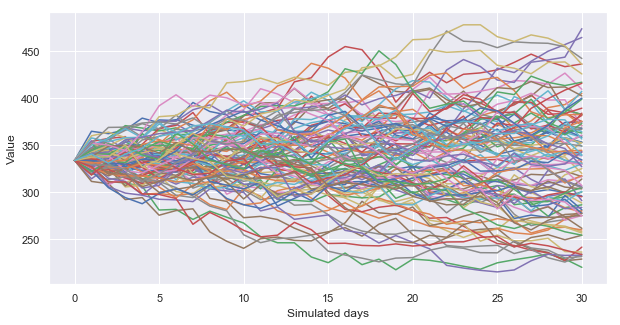

In [5]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


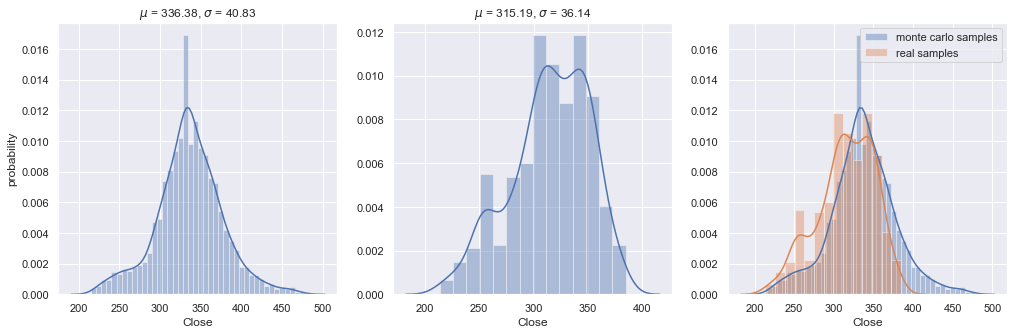

In [6]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.distplot(raveled,norm_hist=True)
plt.xlabel('Close')
plt.ylabel('probability')
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.legend()
plt.show()

In [7]:
returns_volume = df.Volume.pct_change()
std = returns_volume.std()
variance = std ** 2

gaussian_2d = (1 / (2 * np.pi * variance)) * np.exp(-1 * ((returns_volume ** 2 + returns ** 2) / (2 * variance))).std()

print(volatility, gaussian_2d)

0.03043150638893753 0.15576001198642947


In [8]:
for i in range(number_simulation):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        prices.append(prices[d] * (1 + np.random.normal(0, gaussian_2d)))
    results[i] = pd.Series(prices).values

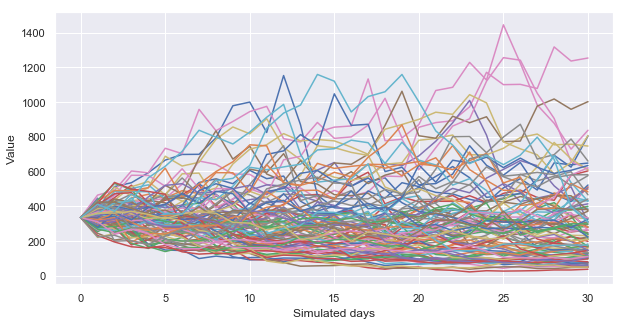

In [9]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

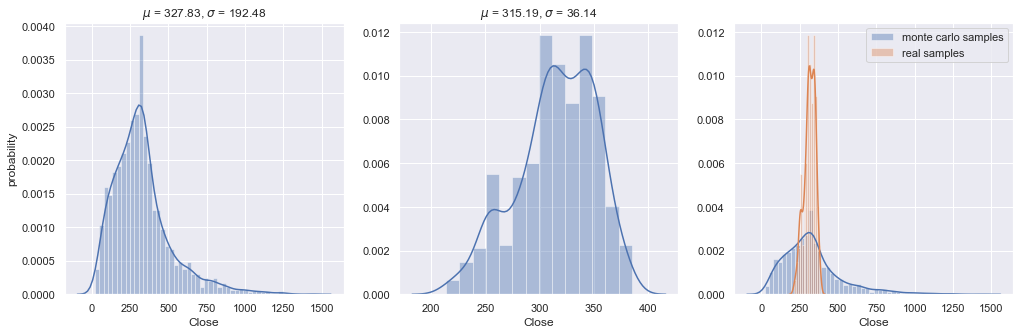

In [10]:
raveled = results.values.ravel()
raveled.sort()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.distplot(raveled,norm_hist=True)
plt.xlabel('Close')
plt.ylabel('probability')
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.legend()
plt.show()

In [11]:
def pct_change(x,period=1):
    x = np.array(x)
    return ((x[period:] - x[:-period]) / x[:-period])

In [12]:
results = pd.DataFrame()

for i in range(number_simulation):
    prices = df.Close.values[-predict_day:].tolist()
    volatility = pct_change(prices[-predict_day:]).std()
    for d in range(predict_day):
        prices.append(prices[-1] * (1 + np.random.normal(0, volatility)))
        volatility = pct_change(prices[-predict_day:]).std()
    results[i] = pd.Series(prices[-predict_day:]).values

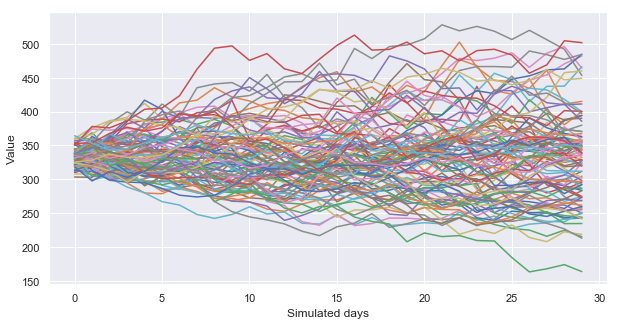

In [13]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

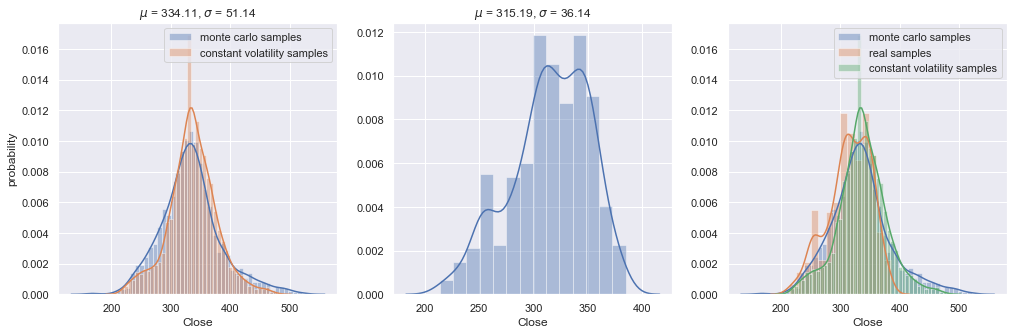

In [14]:
raveled = results.values.ravel()
raveled.sort()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(cp_raveled,norm_hist=True,label='constant volatility samples')
plt.legend()
plt.xlabel('Close')
plt.ylabel('probability')
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
sns.distplot(cp_raveled,norm_hist=True,label='constant volatility samples')
plt.legend()
plt.show()